In [1]:
#Importing the dependensies

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
sns.set()

### Exploratory data analysis

In [3]:
#Importing the Data
data=pd.read_excel('BMI_Data.xlsx')
data.head()

,Date,Weight in Pounds,BMI,Cholesterol
0,1993-07-01,201.38,85.35058,251.200000
1,1993-07-02,202.39,85.31267,254.653866
2,1993-07-03,188.84,85.13161,244.942237
3,1993-07-04,184.13,85.16573,236.066544
4,1993-07-05,192.51,85.15533,247.436015


In [4]:
# Imformation of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              761 non-null    datetime64[ns]
 1   Weight in Pounds  761 non-null    float64       
 2   BMI               761 non-null    float64       
 3   Cholesterol       761 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 23.9 KB


In [5]:
data.isna().sum() # finding the count of missing values from different columns

Date                0
Weight in Pounds    0
BMI                 0
Cholesterol         0
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='BMI', ylabel='Cholesterol'>

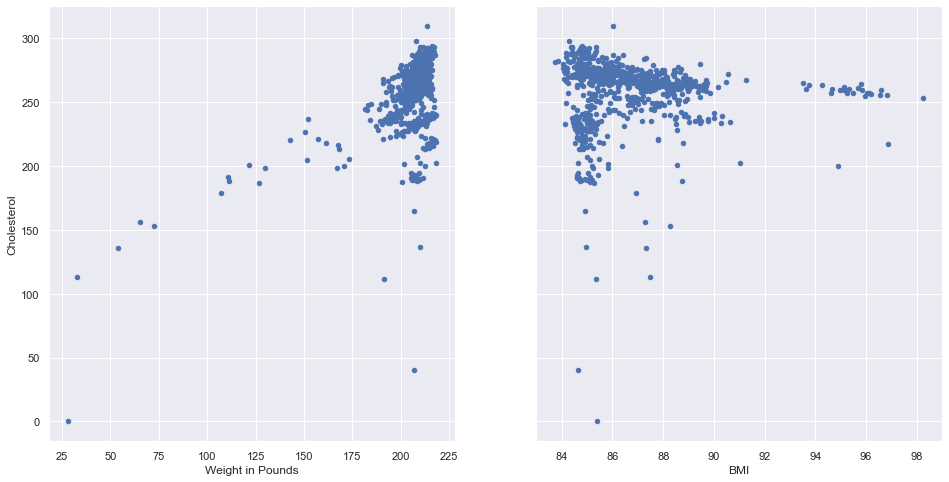

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='Weight in Pounds', y='Cholesterol', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='BMI', y='Cholesterol', ax=axs[1])

The scaterness of the data is not in linear manner

In [7]:
# Profile Report
profile = pp.ProfileReport(data)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
profile

In Profile Report it was found that it was having skewness

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

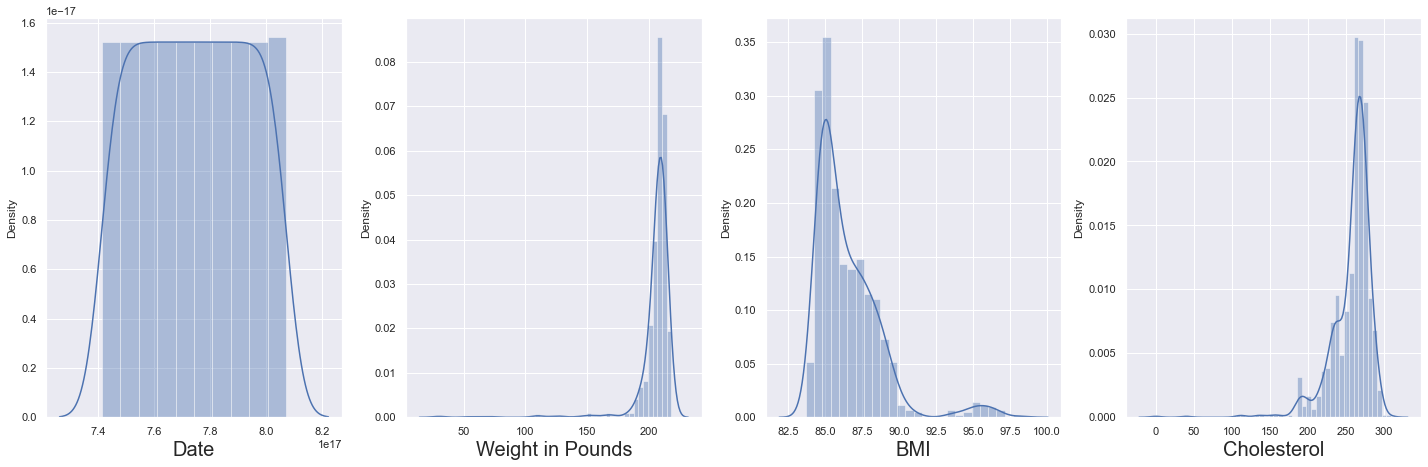

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Skewness of the data

In [10]:
# Date column no need for model training so we are droping it
data=data.drop(['Date'],axis=1)
data

,Weight in Pounds,BMI,Cholesterol
0,201.38,85.35058,251.200000
1,202.39,85.31267,254.653866
2,188.84,85.13161,244.942237
3,184.13,85.16573,236.066544
4,192.51,85.15533,247.436015
...,...,...,...
756,212.23,84.72916,213.445089
757,212.65,84.69604,212.924841
758,214.08,84.79000,216.699800
759,213.87,85.01045,214.869370


In [11]:
# spliting the data
x=data.iloc[:,:-1]
y=data[['Cholesterol']]


### Found Outliers in the data it will affect the training

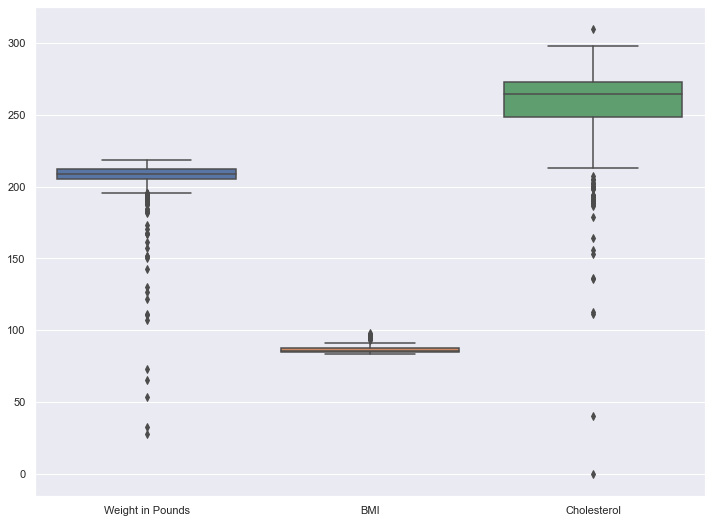

In [12]:
import seaborn as sns
plt.figure(figsize=(12, 9))
ax = sns.boxplot(data=data)

In [13]:
data['Cholesterol'].describe()

count    761.000000
mean     257.247678
std       27.467817
min        0.000000
25%      248.631520
50%      264.743919
75%      272.940000
max      309.478148
Name: Cholesterol, dtype: float64

### IQR Technique to remove the Outliers

In [14]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data.Cholesterol.quantile(0.75)-data.Cholesterol.quantile(0.25)

In [15]:
#### Extreme outliers
lower_bridge=data['Cholesterol'].quantile(0.25)-(IQR*3)
upper_bridge=data['Cholesterol'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

175.70607985191344
345.8654401110649


(None, None)

In [16]:
#### Extreme outliers
lower_bridge=data['BMI'].quantile(0.25)-(IQR*3)
upper_bridge=data['BMI'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

12.054179888935082
160.4920301110649


(None, None)

In [17]:
#### Extreme outliers
lower_bridge=data['Weight in Pounds'].quantile(0.25)-(IQR*3)
upper_bridge=data['Weight in Pounds'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

132.45455988893508
284.84544011106493


(None, None)

In [18]:
#Copyed the master data
new_data=data.copy()

In [19]:
new_data.loc[new_data['Weight in Pounds']<=198,'Weight in Pounds']=198
new_data.loc[new_data['BMI']>=92,'BMI']=92
new_data.loc[new_data['Cholesterol']<=200,'Cholesterol']=200

In [20]:
new_data

,Weight in Pounds,BMI,Cholesterol
0,201.38,85.35058,251.200000
1,202.39,85.31267,254.653866
2,198.00,85.13161,244.942237
3,198.00,85.16573,236.066544
4,198.00,85.15533,247.436015
...,...,...,...
756,212.23,84.72916,213.445089
757,212.65,84.69604,212.924841
758,214.08,84.79000,216.699800
759,213.87,85.01045,214.869370


## Box plot for BMI

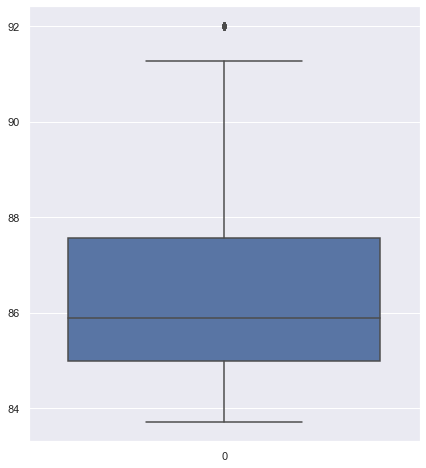

In [21]:
plt.figure(figsize=(7, 8))
ax = sns.boxplot(data=new_data['BMI'])

## Box plot for Cholesterol

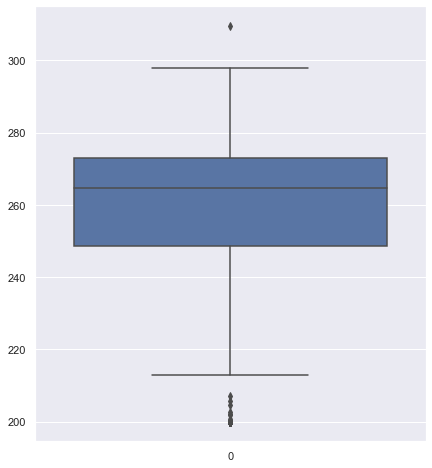

In [22]:
plt.figure(figsize=(7, 8))
ax = sns.boxplot(data=new_data['Cholesterol'])

## Box plot for Weight in Pounds

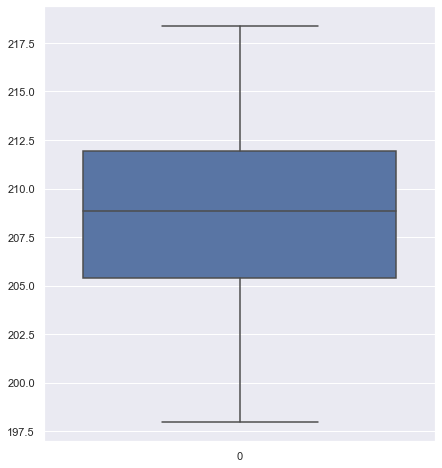

In [23]:
plt.figure(figsize=(7, 8))
ax = sns.boxplot(data=new_data['Weight in Pounds'])

### Distribution of the data

<Figure size 720x720 with 0 Axes>

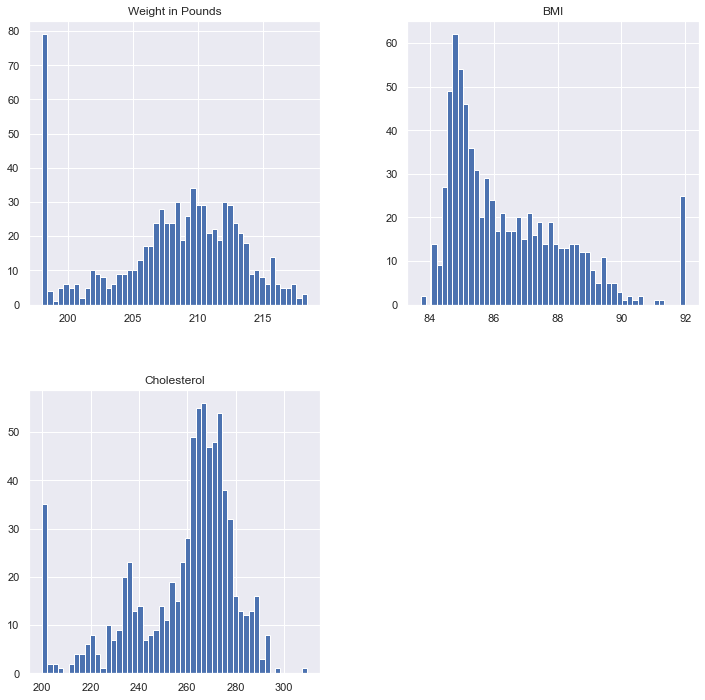

In [24]:
plt.figure(figsize=(10, 10))
figure=new_data.hist(bins=50,figsize=(12,12))


In [25]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

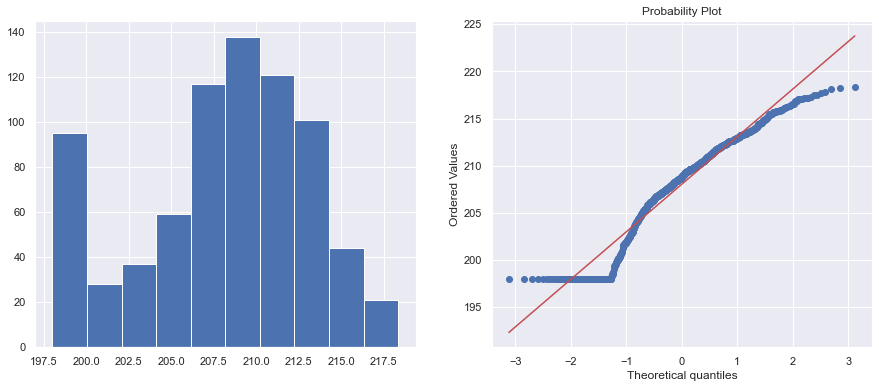

In [26]:
diagnostic_plots(new_data, 'Weight in Pounds')

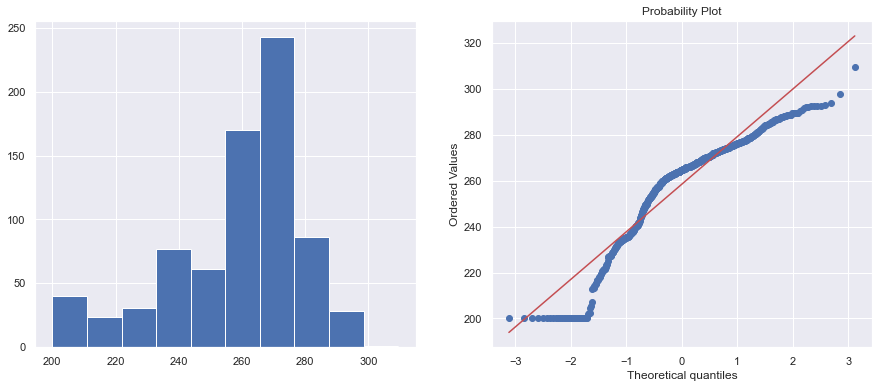

In [27]:
diagnostic_plots(new_data, 'Cholesterol')

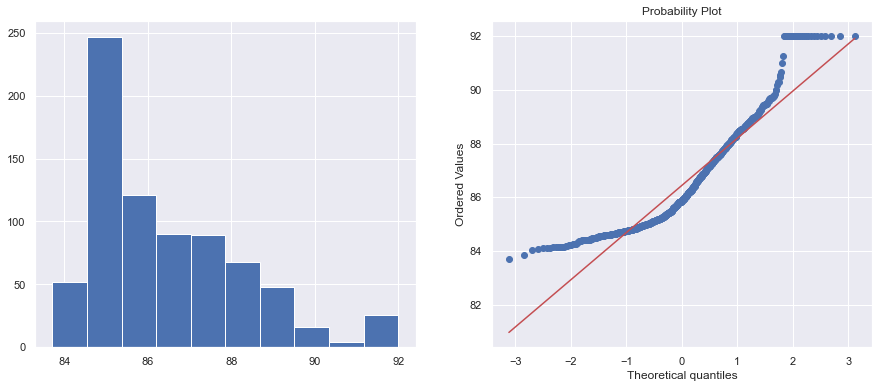

In [28]:
diagnostic_plots(new_data,'BMI')

Optimal lambda:  5.439538039027416


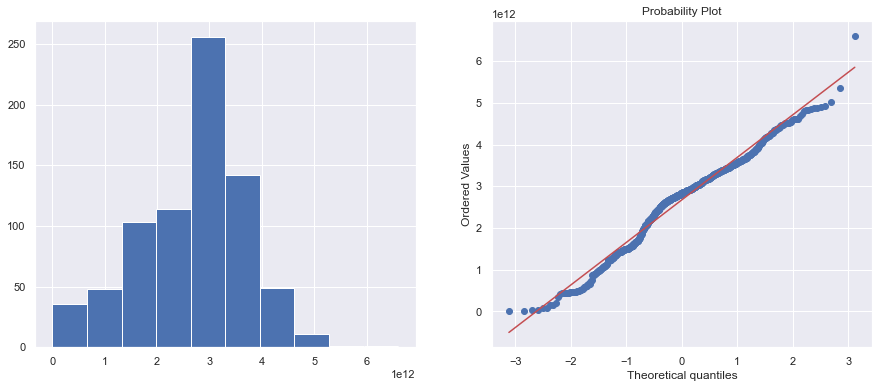

In [29]:
from scipy.stats import boxcox 
new_data['Cholesterol_trans'], param = stats.boxcox(data.Cholesterol+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(new_data, 'Cholesterol_trans')

In [32]:
new_data=new_data.drop(['Cholesterol_trans'],axis=1)


In [33]:
new_data

,Weight in Pounds,BMI,Cholesterol
0,201.38,85.35058,251.200000
1,202.39,85.31267,254.653866
2,198.00,85.13161,244.942237
3,198.00,85.16573,236.066544
4,198.00,85.15533,247.436015
...,...,...,...
756,212.23,84.72916,213.445089
757,212.65,84.69604,212.924841
758,214.08,84.79000,216.699800
759,213.87,85.01045,214.869370


In [36]:
# spliting the data
x1=new_data.iloc[:,:-1]
y1=new_data[['Cholesterol']]


In [37]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled1 = scaler.fit_transform(x1)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled1,y1,test_size=0.3)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.15101185174445186

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [70]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(x1)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [72]:
vif

,VIF,Features
0,1.000202,Weight in Pounds
1,1.000202,BMI


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

# Multiple Models traing at a same time


In [73]:
import random
import scipy
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scikitplot as skplt
import sklearn
from sklearn import preprocessing
from sklearn import datasets 
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct,WhiteKernel,RBF,Matern,RationalQuadratic,ExpSineSquared,ConstantKernel,PairwiseKernel
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import *
from sklearn.metrics import *

In [74]:
def train_SVR(X_train, y_train):
    print('Training SVR ...')
    svr = SVR()
    param_distributions = {
        'kernel' : [DotProduct(),WhiteKernel(),RBF(),Matern(),RationalQuadratic()],
        'C' : scipy.stats.reciprocal(1.0, 10.),
#         'epsilon' : scipy.stats.uniform(0.1, 0.5),
#         'gamma' : scipy.stats.reciprocal(0.01, 0.1),
    }
    randcv = RandomizedSearchCV(svr,param_distributions,n_iter=20,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_DecisionTree(X_train, y_train):
    print('Training DecisionTree ...')
    tree = DecisionTreeRegressor(random_state=0)
    param_distributions = {
        'max_depth' : scipy.stats.randint(10,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(tree,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_RandomForest(X_train, y_train):
    print('Training RandomForest ...')
    forest = RandomForestRegressor(random_state=0, warm_start=True)
    param_distributions = {
        'max_depth' : scipy.stats.randint(1,50),
        'n_estimators' : scipy.stats.randint(100,200)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(forest,param_distributions,n_iter=10,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

def train_AdaBoost(X_train, y_train):
    print('Training AdaBoost ...')
    boost = AdaBoostRegressor(random_state=0)
    param_distributions = {
        'loss' : ['linear', 'square', 'exponential'],
        'learning_rate' : scipy.stats.uniform(0.75, 1.25),
        'n_estimators' : scipy.stats.randint(40,100)
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(boost,param_distributions,n_iter=30,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv
def train_LinearRegression(X_train,y_train):
    print('Training LinearRegression ...')
    linear = LinearRegression(n_jobs=-1)
    param_distributions = {
        'normalize' : [True,False]
    }
    randcv = sklearn.model_selection.RandomizedSearchCV(linear,param_distributions,n_iter=2,cv=3,n_jobs=-1,random_state=0)
    randcv.fit(X_train, y_train)
    return randcv

In [75]:
def run_all_regrs(X_train, y_train, X_test, y_test):
    all_regrs = []
    regr_names = []

    regr1 = train_SVR(X_train, y_train)
    all_regrs.append(regr1.best_estimator_)
    regr_names.append('SVR')

    regr2 = train_DecisionTree(X_train, y_train)
    all_regrs.append(regr2.best_estimator_)
    regr_names.append('Decision Tree')

    regr3 = train_RandomForest(X_train, y_train)
    all_regrs.append(regr3.best_estimator_)
    regr_names.append('Random Forest')
    filename = 'finalized_model.pickle'
    pickle.dump(regr3, open(filename, 'wb'))

    regr4 = train_AdaBoost(X_train, y_train)
    all_regrs.append(regr4.best_estimator_)
    regr_names.append('AdaBoost')


    regr5 = train_LinearRegression(X_train, y_train)
    all_regrs.append(regr5.best_estimator_)
    regr_names.append('Linear Regression')
    filename = 'linear_model.pickle'
    pickle.dump(regr5, open(filename, 'wb'))


    return all_regrs, regr_names

In [76]:
def plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names, file_name):
    plt.figure(figsize=(18,8))
    plt.suptitle("Dataset: %s"%file_name, size=16)
    ax1 = plt.subplot(121)
    mse_scores = plot_mse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax1)
    ax2 = plt.subplot(122)
    ax2.set_xlim(0,1)
    r2_scores = plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names,ax2)
    #plt.savefig(IMAGE_PATH+file.split('.')[0]+'_mse-r2')
    plt.show()
    return mse_scores,r2_scores

def plot_mse_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    mse_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.mean_squared_error(y_train, train_preds)
        test_score = sklearn.metrics.mean_squared_error(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        mse_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v,ind[i]-width/2.5,'%.3f'%v)
        plt.text(test_scores[i],ind[i]+width/1.5,'%.3f'%test_scores[i])
        
    plt.yticks(ind, regr_names) 
    plt.xlabel('MSE')
    plt.title('Mean Squared Error Of All Regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
#     ax.yaxis.tick_right()
    return mse_scores

def plot_r2_score(X_train, y_train, X_test, y_test, all_regrs, regr_names, ax):
    r2_scores = dict()
    training_scores = []
    test_scores = []
    
    for regr, regr_name in zip(all_regrs, regr_names):
        train_preds = regr.predict(X_train)
        test_preds = regr.predict(X_test)
        train_score = sklearn.metrics.r2_score(y_train, train_preds)
        test_score = sklearn.metrics.r2_score(y_test, test_preds)
        training_scores.append(train_score)
        test_scores.append(test_score)
        r2_scores[regr_name] = test_score
        
    N = len(all_regrs)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.barh(ind-width/2, training_scores, align='center', label='Training Set', height=width)
    p2 = plt.barh(ind+width/2, test_scores, align='center', label='Test Set', height=width)
    for i, v in enumerate(training_scores):
        plt.text(v+0.01,ind[i]-width/2.5,'%.3f'%v)
        plt.text(max(test_scores[i],0)+0.01,ind[i]+width/1.5,'%.3f'%test_scores[i])

    plt.yticks(ind, regr_names)
    plt.xlabel('R² Score')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('R² Scores Of All regressors')
    plt.legend(handles=[p1,p2])
    plt.gca().invert_yaxis()
#     plt.gca().invert_xaxis()
    ax.yaxis.tick_right()
    return r2_scores

Training SVR ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:279: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True).astype(np.float64, copy=False)


Training DecisionTree ...
Training RandomForest ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Training AdaBoost ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Training LinearRegression ...


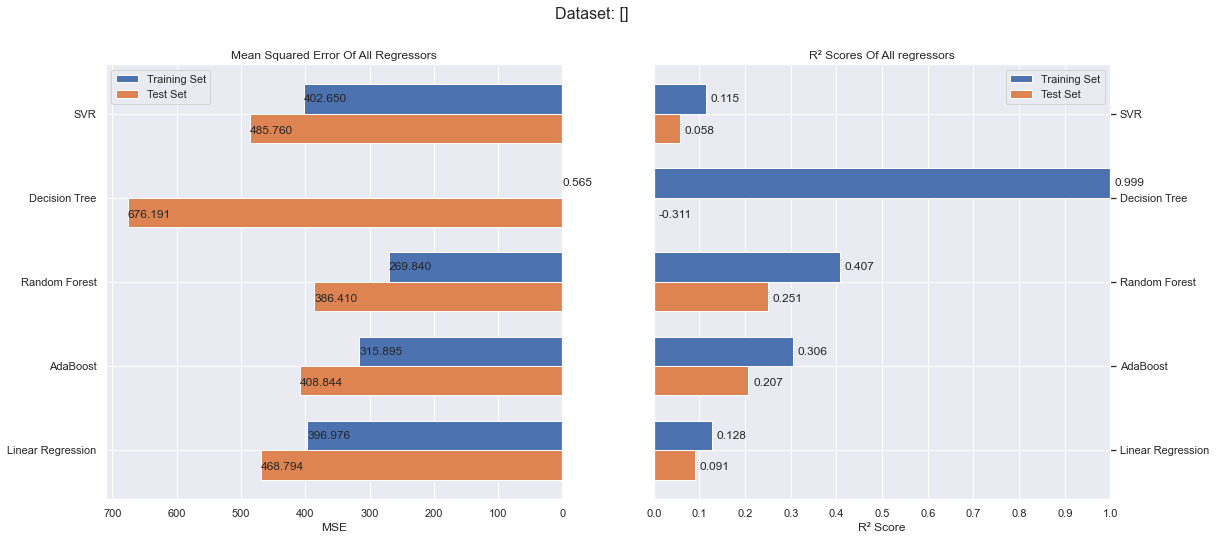

In [81]:
all_mse = dict()
all_r2 = dict()
IMAGE_PATH = 'image/'
files = []

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y1,test_size=0.3,random_state=0)
all_regrs, regr_names = run_all_regrs(X_train, y_train, X_test, y_test)
mse, r2 = plot_all(X_train, y_train, X_test, y_test, all_regrs, regr_names,files)
    
for k,v in mse.items():
    if k not in all_mse:
        all_mse[k] = list()
        all_mse[k].append(v)
for k,v in r2.items():
    if k not in all_r2:
        all_r2[k] = list()
        all_r2[k].append(v)   

In [82]:
for k,v in all_mse.items():
    print('%s-mse:'%k,["%.3f"%i for i in v])

SVR-mse: ['485.760']
Decision Tree-mse: ['676.191']
Random Forest-mse: ['386.410']
AdaBoost-mse: ['408.844']
Linear Regression-mse: ['468.794']


In [83]:
for k,v in all_r2.items():
    print('%s-r2:'%k,["%.3f"%i for i in v])

SVR-r2: ['0.058']
Decision Tree-r2: ['-0.311']
Random Forest-r2: ['0.251']
AdaBoost-r2: ['0.207']
Linear Regression-r2: ['0.091']


In [84]:
  for k,v in all_r2.items():
    print('%s avg r2: %.2f, avg mse: %.2f'%(k,np.mean(v),np.mean(all_mse[k])))

SVR avg r2: 0.06, avg mse: 485.76
Decision Tree avg r2: -0.31, avg mse: 676.19
Random Forest avg r2: 0.25, avg mse: 386.41
AdaBoost avg r2: 0.21, avg mse: 408.84
Linear Regression avg r2: 0.09, avg mse: 468.79


In [86]:
for k,v in all_r2.items():
    print('%s avg r2: %.2f, avg mse: %.2f'%(k,np.mean(v),np.mean(all_mse[k])))

SVR avg r2: 0.06, avg mse: 485.76
Decision Tree avg r2: -0.31, avg mse: 676.19
Random Forest avg r2: 0.25, avg mse: 386.41
AdaBoost avg r2: 0.21, avg mse: 408.84
Linear Regression avg r2: 0.09, avg mse: 468.79


In [90]:
import pickle
# prediction using the saved model
filename = 'finalized_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[202.39,85.31267]]))
a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([260.4083233])

In [89]:
filename = 'linear_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))
b=loaded_model.predict(scaler.transform([[202.39,85.31267]]))
b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[251.08316726]])

### Conclusion
Compare to other model Linear regression is performing well so we can use linear regression for production 